## HR Analytics Model

In [130]:
##Import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pk
import seaborn as sns

In [131]:
##Importing dataset
HRDF = pd.read_csv("HR_ANALYTICS.csv")
testHR = pd.read_csv("testHR.csv")

In [132]:
HRDF.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [133]:
HRDF.shape

(54808, 14)

In [134]:
HRDF.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [135]:
HRDF.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [136]:
HRDF['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [137]:
HRDF['education'].nunique()


3

In [138]:
HRDF['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [139]:
HRDF['previous_year_rating'].nunique()

5

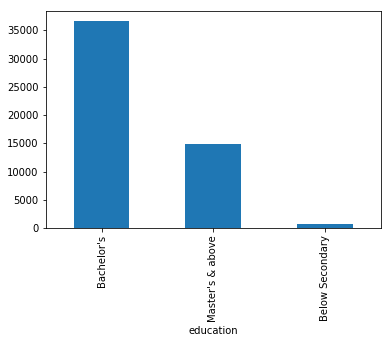

In [140]:
HRDF.groupby(['education'])['education'].count().sort_values(ascending=False).plot.bar()

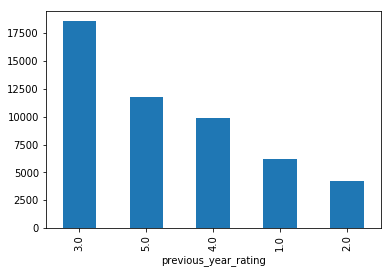

In [141]:
HRDF.groupby(['previous_year_rating'])['previous_year_rating'].count().sort_values(ascending=False).plot.bar()

In [142]:
HRDF.groupby(['education'])['education'].count().sort_values(ascending=False)

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [143]:
HRDF.groupby(['previous_year_rating'])['previous_year_rating'].count().sort_values(ascending=False)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [144]:
HRDF.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [145]:
HRDF.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## Random Sample imputation

In [146]:
# let's create a variable to replace NA with a random sample

def impute_na_random_sample(df, variable):
    # random sampling
    df[variable+'_random'] = df[variable]
        
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), 
                                                 random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [147]:
impute_na_random_sample(HRDF,'education')
impute_na_random_sample(HRDF,'previous_year_rating')
impute_na_random_sample(testHR,'education')
impute_na_random_sample(testHR,'previous_year_rating')

In [148]:
HRDF.isnull().sum()

employee_id                       0
department                        0
region                            0
education                      2409
gender                            0
recruitment_channel               0
no_of_trainings                   0
age                               0
previous_year_rating           4124
length_of_service                 0
KPIs_met >80%                     0
awards_won?                       0
avg_training_score                0
is_promoted                       0
education_random                  0
previous_year_rating_random       0
dtype: int64

In [149]:
HRDF.columns.values

array(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'education_random', 'previous_year_rating_random'], dtype=object)

In [150]:
HRDF.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_random,previous_year_rating_random
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Master's & above,5.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Bachelor's,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Bachelor's,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Bachelor's,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Bachelor's,3.0


In [151]:
HRDF = HRDF.drop(['education','previous_year_rating'],axis=1)
testHR = testHR.drop(['education','previous_year_rating'],axis=1)

# Probablity Encodeing Department

In [152]:
#Since is_promoted already contain 0 and 1
#HRDF['is_promoted'] = HRDF['is_promoted'].apply(lambda x: 1 if x == 'Yes' else 0)
HRDF.groupby(['department'])['is_promoted'].mean()

department
Analytics            0.095665
Finance              0.081230
HR                   0.056245
Legal                0.051011
Operations           0.090148
Procurement          0.096386
R&D                  0.069069
Sales & Marketing    0.072031
Technology           0.107593
Name: is_promoted, dtype: float64

In [153]:
ordered_department = HRDF.groupby(['department'])['is_promoted'].mean().to_dict()
ordered_department

{'Analytics': 0.09566517189835576,
 'Finance': 0.08123028391167192,
 'HR': 0.05624483043837883,
 'Legal': 0.05101058710298364,
 'Operations': 0.0901480437081424,
 'Procurement': 0.0963855421686747,
 'R&D': 0.06906906906906907,
 'Sales & Marketing': 0.07203087885985748,
 'Technology': 0.10759316335107873}

In [154]:
HRDF['Depart_Prob'] = HRDF['department'].map(ordered_department)
testHR['Depart_Prob'] = testHR['department'].map(ordered_department)
HRDF.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_random,previous_year_rating_random,Depart_Prob
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0,Master's & above,5.0,0.072031
1,65141,Operations,region_22,m,other,1,30,4,0,0,60,0,Bachelor's,5.0,0.090148
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0,Bachelor's,3.0,0.072031
3,2542,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0,Bachelor's,1.0,0.072031
4,48945,Technology,region_26,m,other,1,45,2,0,0,73,0,Bachelor's,3.0,0.107593


# Frequency Encodeing for department

In [155]:
#HRDF['department'].value_counts()

In [156]:
#count_dict = HRDF['department'].value_counts().to_dict()
#count_dict

In [157]:
#HRDF['department'] = HRDF['department'].map(count_dict)

In [158]:
#HRDF.head()

# Probablity Encodeing for region

In [159]:
HRDF.groupby(['region'])['is_promoted'].mean()

region
region_1     0.095082
region_10    0.078704
region_11    0.056274
region_12    0.066000
region_13    0.086858
region_14    0.074970
region_15    0.079060
region_16    0.069625
region_17    0.136935
region_18    0.032258
region_19    0.060641
region_2     0.080126
region_20    0.057647
region_21    0.043796
region_22    0.114188
region_23    0.116596
region_24    0.035433
region_25    0.125763
region_26    0.063274
region_27    0.078963
region_28    0.116844
region_29    0.043260
region_3     0.106936
region_30    0.089802
region_31    0.056848
region_32    0.042328
region_33    0.037175
region_34    0.027397
region_4     0.144451
region_5     0.045692
region_6     0.046377
region_7     0.106546
region_8     0.080916
region_9     0.019048
Name: is_promoted, dtype: float64

In [160]:
ordered_region = HRDF.groupby(['region'])['is_promoted'].mean().to_dict()
ordered_region

{'region_1': 0.09508196721311475,
 'region_10': 0.0787037037037037,
 'region_11': 0.05627376425855513,
 'region_12': 0.066,
 'region_13': 0.08685800604229607,
 'region_14': 0.07496977025392987,
 'region_15': 0.07905982905982906,
 'region_16': 0.0696245733788396,
 'region_17': 0.13693467336683418,
 'region_18': 0.03225806451612903,
 'region_19': 0.06064073226544622,
 'region_2': 0.08012638742607146,
 'region_20': 0.05764705882352941,
 'region_21': 0.043795620437956206,
 'region_22': 0.11418792781580585,
 'region_23': 0.11659574468085106,
 'region_24': 0.03543307086614173,
 'region_25': 0.12576312576312576,
 'region_26': 0.06327433628318584,
 'region_27': 0.07896323086196504,
 'region_28': 0.11684370257966616,
 'region_29': 0.043259557344064385,
 'region_3': 0.1069364161849711,
 'region_30': 0.0898021308980213,
 'region_31': 0.056847545219638244,
 'region_32': 0.042328042328042326,
 'region_33': 0.03717472118959108,
 'region_34': 0.0273972602739726,
 'region_4': 0.1444509688784498,
 'reg

In [161]:
HRDF['region_Prob'] = HRDF['region'].map(ordered_region)
testHR['region_Prob'] = testHR['region'].map(ordered_region)
HRDF.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_random,previous_year_rating_random,Depart_Prob,region_Prob
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0,Master's & above,5.0,0.072031,0.106546
1,65141,Operations,region_22,m,other,1,30,4,0,0,60,0,Bachelor's,5.0,0.090148,0.114188
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0,Bachelor's,3.0,0.072031,0.060641
3,2542,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0,Bachelor's,1.0,0.072031,0.116596
4,48945,Technology,region_26,m,other,1,45,2,0,0,73,0,Bachelor's,3.0,0.107593,0.063274


# Frequency Encodeing for region

In [162]:
#HRDF['region'].value_counts()

In [163]:
#count_dict = HRDF['region'].value_counts().to_dict()
#count_dict

In [164]:
#HRDF['region'] = HRDF['region'].map(count_dict)

In [165]:
#HRDF.head()

# Probablity Encodeing for Exprience

In [166]:
ordered_experience = HRDF.groupby(['length_of_service'])['is_promoted'].mean().to_dict()
ordered_experience

{1: 0.08291180998460523,
 2: 0.08901855176540993,
 3: 0.08659178160102375,
 4: 0.08747805734347572,
 5: 0.08144718792866941,
 6: 0.08470637938318547,
 7: 0.08358854260493605,
 8: 0.09330558446063128,
 9: 0.08710536325599087,
 10: 0.09302325581395349,
 11: 0.10480349344978165,
 12: 0.07934508816120907,
 13: 0.07860262008733625,
 14: 0.052823315118397086,
 15: 0.07251264755480608,
 16: 0.07481751824817519,
 17: 0.06018518518518518,
 18: 0.06377551020408163,
 19: 0.0972644376899696,
 20: 0.078125,
 21: 0.05128205128205128,
 22: 0.09836065573770492,
 23: 0.1076923076923077,
 24: 0.0,
 25: 0.0392156862745098,
 26: 0.0,
 27: 0.027777777777777776,
 28: 0.06666666666666667,
 29: 0.1,
 30: 0.0,
 31: 0.0,
 32: 0.2,
 33: 0.0,
 34: 0.25,
 37: 0.0}

In [167]:
HRDF['experience_Prob'] = HRDF['length_of_service'].map(ordered_experience)
testHR['experience_Prob'] = testHR['length_of_service'].map(ordered_experience)
HRDF.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_random,previous_year_rating_random,Depart_Prob,region_Prob,experience_Prob
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0,Master's & above,5.0,0.072031,0.106546,0.093306
1,65141,Operations,region_22,m,other,1,30,4,0,0,60,0,Bachelor's,5.0,0.090148,0.114188,0.087478
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0,Bachelor's,3.0,0.072031,0.060641,0.083589
3,2542,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0,Bachelor's,1.0,0.072031,0.116596,0.093023
4,48945,Technology,region_26,m,other,1,45,2,0,0,73,0,Bachelor's,3.0,0.107593,0.063274,0.089019


# Frequency Encodeing for experiance

In [168]:
#HRDF['length_of_service'].value_counts()

In [169]:
#count_dict = HRDF['length_of_service'].value_counts().to_dict()
#count_dict

In [170]:
#HRDF['length_of_service'] = HRDF['length_of_service'].map(count_dict)
#HRDF.head()

In [171]:
#HRDF['no_of_trainings'].value_counts()

In [172]:
#count_dict = HRDF['no_of_trainings'].value_counts().to_dict()

In [173]:
#HRDF['no_of_trainings'] = HRDF['no_of_trainings'].map(count_dict)
#HRDF.head()

# weight of evidence Encodeing for recruitment_channel

In [174]:
recruitment_probWOE = HRDF.groupby(['recruitment_channel'])['is_promoted'].mean()
recruitment_probWOE = pd.DataFrame(recruitment_probWOE)
recruitment_probWOE

,is_promoted
recruitment_channel,
other,0.083952
referred,0.120841
sourcing,0.085013


In [175]:
# now let's  calculate the probability of target = 0 (people who did not purchase)
recruitment_probWOE = HRDF.groupby(['recruitment_channel'])['is_promoted'].mean()
recruitment_probWOE = pd.DataFrame(recruitment_probWOE)
recruitment_probWOE['Not_Promoted'] = 1-recruitment_probWOE['is_promoted']
recruitment_probWOE

,is_promoted,Not_Promoted
recruitment_channel,,
other,0.083952,0.916048
referred,0.120841,0.879159
sourcing,0.085013,0.914987


In [176]:
# since the log of zero is not defined
recruitment_probWOE.loc[recruitment_probWOE['is_promoted'] == 0, 'is_promoted'] = 0.00001
recruitment_probWOE.loc[recruitment_probWOE['Not_Promoted'] == 0, 'Not_Promoted'] = 0.00001
recruitment_probWOE

,is_promoted,Not_Promoted
recruitment_channel,,
other,0.083952,0.916048
referred,0.120841,0.879159
sourcing,0.085013,0.914987


In [177]:
recruitment_probWOE['rec_WoE'] = np.log(recruitment_probWOE['is_promoted']/recruitment_probWOE['Not_Promoted'])
recruitment_probWOE

,is_promoted,Not_Promoted,rec_WoE
recruitment_channel,,,
other,0.083952,0.916048,-2.389825
referred,0.120841,0.879159,-1.984494
sourcing,0.085013,0.914987,-2.376107


In [178]:
woe_labels = recruitment_probWOE['rec_WoE'].to_dict()

In [179]:
HRDF['Country_WOE'] = HRDF['recruitment_channel'].map(woe_labels)
testHR['Country_WOE'] = testHR['recruitment_channel'].map(woe_labels)
HRDF.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_random,previous_year_rating_random,Depart_Prob,region_Prob,experience_Prob,Country_WOE
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0,Master's & above,5.0,0.072031,0.106546,0.093306,-2.376107
1,65141,Operations,region_22,m,other,1,30,4,0,0,60,0,Bachelor's,5.0,0.090148,0.114188,0.087478,-2.389825
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0,Bachelor's,3.0,0.072031,0.060641,0.083589,-2.376107
3,2542,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0,Bachelor's,1.0,0.072031,0.116596,0.093023,-2.389825
4,48945,Technology,region_26,m,other,1,45,2,0,0,73,0,Bachelor's,3.0,0.107593,0.063274,0.089019,-2.389825


# Probablity Ration encodeing for education

In [180]:
probEdu_df = HRDF.groupby(['education_random'])['is_promoted'].mean()
probEdu_df = pd.DataFrame(probEdu_df)
probEdu_df

,is_promoted
education_random,
Bachelor's,0.080535
Below Secondary,0.083532
Master's & above,0.096644


In [181]:
# now let's  calculate the probability of target = 0 (people who did not purchase)
probEdu_df = HRDF.groupby(['education_random'])['is_promoted'].mean()
probEdu_df = pd.DataFrame(probEdu_df)
probEdu_df['Not_promoted'] = 1-probEdu_df['is_promoted']
probEdu_df

,is_promoted,Not_promoted
education_random,,
Bachelor's,0.080535,0.919465
Below Secondary,0.083532,0.916468
Master's & above,0.096644,0.903356


In [182]:
probEdu_df['ratio'] = probEdu_df['is_promoted']/probEdu_df['Not_promoted']
probEdu_df

,is_promoted,Not_promoted,ratio
education_random,,,
Bachelor's,0.080535,0.919465,0.087589
Below Secondary,0.083532,0.916468,0.091146
Master's & above,0.096644,0.903356,0.106983


In [183]:
probEdu_df['ratio'].to_dict()

{"Bachelor's": 0.08758896418748405,
 'Below Secondary': 0.09114583333333333,
 "Master's & above": 0.10698333924140375}

In [184]:
prob_labels = probEdu_df['ratio'].to_dict()

In [185]:
HRDF['Education_prob'] = HRDF['education_random'].map(prob_labels)
testHR['Education-prob'] = testHR['education_random'].map(prob_labels)
HRDF.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_random,previous_year_rating_random,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education_prob
0,65438,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0,Master's & above,5.0,0.072031,0.106546,0.093306,-2.376107,0.106983
1,65141,Operations,region_22,m,other,1,30,4,0,0,60,0,Bachelor's,5.0,0.090148,0.114188,0.087478,-2.389825,0.087589
2,7513,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0,Bachelor's,3.0,0.072031,0.060641,0.083589,-2.376107,0.087589
3,2542,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0,Bachelor's,1.0,0.072031,0.116596,0.093023,-2.389825,0.087589
4,48945,Technology,region_26,m,other,1,45,2,0,0,73,0,Bachelor's,3.0,0.107593,0.063274,0.089019,-2.389825,0.087589


In [186]:
#drop department, region, experience, recruitmrnt channel and experience
HRDF = HRDF.drop(['department','region','recruitment_channel','length_of_service','education_random'], axis=1)
testHR = testHR.drop(['department','region','recruitment_channel','length_of_service','education_random'], axis=1)

In [187]:
HRDF.head()

,employee_id,gender,no_of_trainings,age,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating_random,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education_prob
0,65438,f,1,35,1,0,49,0,5.0,0.072031,0.106546,0.093306,-2.376107,0.106983
1,65141,m,1,30,0,0,60,0,5.0,0.090148,0.114188,0.087478,-2.389825,0.087589
2,7513,m,1,34,0,0,50,0,3.0,0.072031,0.060641,0.083589,-2.376107,0.087589
3,2542,m,2,39,0,0,50,0,1.0,0.072031,0.116596,0.093023,-2.389825,0.087589
4,48945,m,1,45,0,0,73,0,3.0,0.107593,0.063274,0.089019,-2.389825,0.087589


# Probablity Ratio Encodeing for previous_year_rating_random

In [188]:
prob_rating = HRDF.groupby(['previous_year_rating_random'])['is_promoted'].mean()
prob_rating = pd.DataFrame(prob_rating)

In [189]:
prob_rating['Not Promoted'] = 1-prob_rating['is_promoted']
prob_rating

,is_promoted,Not Promoted
previous_year_rating_random,,
1.0,0.018820,0.981180
2.0,0.045445,0.954555
3.0,0.073413,0.926587
4.0,0.080391,0.919609
5.0,0.157231,0.842769


In [190]:
prob_rating['ratio'] = prob_rating['is_promoted']/prob_rating['Not Promoted']
prob_rating

,is_promoted,Not Promoted,ratio
previous_year_rating_random,,,
1.0,0.018820,0.981180,0.019181
2.0,0.045445,0.954555,0.047608
3.0,0.073413,0.926587,0.079230
4.0,0.080391,0.919609,0.087419
5.0,0.157231,0.842769,0.186564


In [191]:
prob_rate = prob_rating['ratio'].to_dict()
prob_rate

{1.0: 0.019181001674531892,
 2.0: 0.04760814831769283,
 3.0: 0.07922969638450811,
 4.0: 0.0874189627228525,
 5.0: 0.186564371257485}

In [192]:
HRDF['rating_prob'] = HRDF['previous_year_rating_random'].map(prob_rate)
HRDF.head()

,employee_id,gender,no_of_trainings,age,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating_random,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education_prob,rating_prob
0,65438,f,1,35,1,0,49,0,5.0,0.072031,0.106546,0.093306,-2.376107,0.106983,0.186564
1,65141,m,1,30,0,0,60,0,5.0,0.090148,0.114188,0.087478,-2.389825,0.087589,0.186564
2,7513,m,1,34,0,0,50,0,3.0,0.072031,0.060641,0.083589,-2.376107,0.087589,0.079230
3,2542,m,2,39,0,0,50,0,1.0,0.072031,0.116596,0.093023,-2.389825,0.087589,0.019181
4,48945,m,1,45,0,0,73,0,3.0,0.107593,0.063274,0.089019,-2.389825,0.087589,0.079230


In [193]:
testHR['rating_prob'] = testHR['previous_year_rating_random'].map(prob_rate)

## Probablity Encodeing for gender

In [194]:
prob_gender = HRDF.groupby(['gender'])['is_promoted'].mean()
prob_gender = pd.DataFrame(prob_gender)

In [195]:
prob_gender['Not Promoted'] = 1-prob_gender['is_promoted']
prob_gender

,is_promoted,Not Promoted
gender,,
f,0.089934,0.910066
m,0.083151,0.916849


In [196]:
prob_gender['ratio'] = prob_gender['is_promoted']/prob_gender['Not Promoted']
prob_gender

,is_promoted,Not Promoted,ratio
gender,,,
f,0.089934,0.910066,0.098821
m,0.083151,0.916849,0.090693


In [197]:
prob_gender = prob_gender['ratio'].to_dict()
prob_gender

{'f': 0.09882115190299764, 'm': 0.09069273268168294}

In [198]:
HRDF['prob_gender'] = HRDF['gender'].map(prob_gender)
HRDF.head()

,employee_id,gender,no_of_trainings,age,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating_random,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education_prob,rating_prob,prob_gender
0,65438,f,1,35,1,0,49,0,5.0,0.072031,0.106546,0.093306,-2.376107,0.106983,0.186564,0.098821
1,65141,m,1,30,0,0,60,0,5.0,0.090148,0.114188,0.087478,-2.389825,0.087589,0.186564,0.090693
2,7513,m,1,34,0,0,50,0,3.0,0.072031,0.060641,0.083589,-2.376107,0.087589,0.079230,0.090693
3,2542,m,2,39,0,0,50,0,1.0,0.072031,0.116596,0.093023,-2.389825,0.087589,0.019181,0.090693
4,48945,m,1,45,0,0,73,0,3.0,0.107593,0.063274,0.089019,-2.389825,0.087589,0.079230,0.090693


In [199]:
testHR['prob_gender'] = testHR['gender'].map(prob_gender)

In [200]:
HRDF = HRDF.drop(['gender','previous_year_rating_random'],axis = 1)

In [201]:
testHR = testHR.drop(['gender','previous_year_rating_random'], axis = 1)

# One Hot encodeing

In [202]:
# obtaining k-1 labels
HRDF = pd.get_dummies(HRDF, drop_first=True, columns=[ 'KPIs_met >80%',
                                                      'awards_won?','is_promoted'])
testHR = pd.get_dummies(testHR, drop_first=True, columns=['KPIs_met >80%',
                                                      'awards_won?'])


In [203]:
HRDF.head(1)

,employee_id,no_of_trainings,age,avg_training_score,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education_prob,rating_prob,prob_gender,KPIs_met >80%_1,awards_won?_1,is_promoted_1
0,65438,1,35,49,0.072031,0.106546,0.093306,-2.376107,0.106983,0.186564,0.098821,1,0,0


In [204]:
HRDFtrainClumns = HRDF.columns.values

In [205]:
HRDFtrainClumns

array(['employee_id', 'no_of_trainings', 'age', 'avg_training_score',
       'Depart_Prob', 'region_Prob', 'experience_Prob', 'Country_WOE',
       'Education_prob', 'rating_prob', 'prob_gender', 'KPIs_met >80%_1',
       'awards_won?_1', 'is_promoted_1'], dtype=object)

In [206]:
HRDF.head()

,employee_id,no_of_trainings,age,avg_training_score,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education_prob,rating_prob,prob_gender,KPIs_met >80%_1,awards_won?_1,is_promoted_1
0,65438,1,35,49,0.072031,0.106546,0.093306,-2.376107,0.106983,0.186564,0.098821,1,0,0
1,65141,1,30,60,0.090148,0.114188,0.087478,-2.389825,0.087589,0.186564,0.090693,0,0,0
2,7513,1,34,50,0.072031,0.060641,0.083589,-2.376107,0.087589,0.079230,0.090693,0,0,0
3,2542,2,39,50,0.072031,0.116596,0.093023,-2.389825,0.087589,0.019181,0.090693,0,0,0
4,48945,1,45,73,0.107593,0.063274,0.089019,-2.389825,0.087589,0.079230,0.090693,0,0,0


In [207]:
models = []
acc = []
precision = []
recall = []
f1 = []

In [208]:
HRDF.head()

,employee_id,no_of_trainings,age,avg_training_score,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education_prob,rating_prob,prob_gender,KPIs_met >80%_1,awards_won?_1,is_promoted_1
0,65438,1,35,49,0.072031,0.106546,0.093306,-2.376107,0.106983,0.186564,0.098821,1,0,0
1,65141,1,30,60,0.090148,0.114188,0.087478,-2.389825,0.087589,0.186564,0.090693,0,0,0
2,7513,1,34,50,0.072031,0.060641,0.083589,-2.376107,0.087589,0.079230,0.090693,0,0,0
3,2542,2,39,50,0.072031,0.116596,0.093023,-2.389825,0.087589,0.019181,0.090693,0,0,0
4,48945,1,45,73,0.107593,0.063274,0.089019,-2.389825,0.087589,0.079230,0.090693,0,0,0


In [209]:
train_columns = HRDF.columns.values

In [210]:
HRDF.shape

(54808, 14)

In [211]:
X = HRDF.iloc[:, 1:13].values
y = HRDF.iloc[:, 13].values
test = testHR.iloc[:, 1:13].values

In [212]:
X

array([[ 1.        , 35.        , 49.        , ...,  0.09882115,
         1.        ,  0.        ],
       [ 1.        , 30.        , 60.        , ...,  0.09069273,
         0.        ,  0.        ],
       [ 1.        , 34.        , 50.        , ...,  0.09069273,
         0.        ,  0.        ],
       ...,
       [ 1.        , 27.        , 79.        , ...,  0.09069273,
         1.        ,  0.        ],
       [ 1.        , 29.        , 45.        , ...,  0.09069273,
         0.        ,  0.        ],
       [ 1.        , 27.        , 49.        , ...,  0.09069273,
         0.        ,  0.        ]])

## Since dataset contains most of the not pramoted values in is promoted
## we are treating this problem as imbalance problem and overfitting the data by using SMOTE

In [213]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X, y = sm.fit_sample(X, y)

In [214]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [215]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [216]:
X_train = sc.fit_transform(X_train)

In [217]:
sc.mean_

array([ 1.21199594e+00,  3.46453704e+01,  6.69660230e+01,  8.63892213e-02,
        8.86515830e-02,  8.55430083e-02, -2.37534242e+00,  9.35101840e-02,
        1.08352264e-01,  9.32077191e-02,  5.15990836e-01,  5.61417355e-02])

In [218]:
sc.var_

array([2.85370819e-01, 5.50682394e+01, 2.11558795e+02, 1.96381825e-04,
       5.85613789e-04, 5.49314119e-05, 2.85644833e-03, 7.02214347e-05,
       2.87642844e-03, 1.20234560e-05, 2.40088099e-01, 4.54950868e-02])

In [219]:
X_test = sc.transform(X_test)

In [220]:
test = sc.transform(test)

# Logistic Regression

In [221]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
models.append('Logistic Regression')

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [222]:
#Save the model on disk
pk.dump(lr, open('logistic_regression.sav','wb'))

In [223]:
lr.coef_

array([[-0.21251988, -0.02132355,  1.1286985 , -0.54764688,  0.30497097,
         0.08577793, -0.02809649,  0.06720335,  0.38600911,  0.07543363,
         0.90591903,  0.40856713]])

In [224]:
lr.intercept_

array([0.02502905])

In [225]:
lr.n_iter_

array([5], dtype=int32)

In [226]:
lr.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [227]:
probs = lr.predict_proba(X_test)
probs

array([[0.44091117, 0.55908883],
       [0.4202728 , 0.5797272 ],
       [0.44292109, 0.55707891],
       ...,
       [0.42441929, 0.57558071],
       [0.28289998, 0.71710002],
       [0.86002558, 0.13997442]])

In [228]:
#Load Model to predict
#loaded_model_lr = pk.load(open('logistic_regression.sav', 'rb'))
#import pickle as pk
loaded_lr = pk.load(open('logistic_regression.sav','rb'))

### Evaluation Logistic Regression through Confusion Matrix

In [229]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score)

In [230]:
print('Confusion Matrix for LR: \n',confusion_matrix(y_test, lr.predict(X_test)))
print('Accuracy for LR: \n',accuracy_score(y_test, lr.predict(X_test)))
acc.append(accuracy_score(y_test, lr.predict(X_test)))
print('Precision for LR: \n',precision_score(y_test, lr.predict(X_test)))
precision.append(precision_score(y_test, lr.predict(X_test)))
print('Recall for LR: \n',recall_score(y_test, lr.predict(X_test)))
recall.append(recall_score(y_test, lr.predict(X_test)))
print('f1_score for LR: \n',f1_score(y_test, lr.predict(X_test)))
f1.append(f1_score(y_test, lr.predict(X_test)))

Confusion Matrix for LR: 
 [[8994 3463]
 [2957 9656]]
Accuracy for LR: 
 0.7439170323095333
Precision for LR: 
 0.7360317097339736
Recall for LR: 
 0.7655593435344485
f1_score for LR: 
 0.7505052075237059


In [231]:
lr_results = lr.predict(test)
lr_results

array([1, 0, 0, ..., 0, 0, 1], dtype=uint8)

# Decision Trees

In [232]:
# Display tree objects
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [233]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', 
                            max_depth=3 ,
                            random_state = 0)
dt.fit(X_train, y_train)
models.append('Decision Trees')

In [234]:
HRDF.columns

Index(['employee_id', 'no_of_trainings', 'age', 'avg_training_score',
       'Depart_Prob', 'region_Prob', 'experience_Prob', 'Country_WOE',
       'Education_prob', 'rating_prob', 'prob_gender', 'KPIs_met >80%_1',
       'awards_won?_1', 'is_promoted_1'],
      dtype='object')

In [235]:
#Save the model on disk
pk.dump(dt, open('decision_trees.sav','wb'))

In [236]:
dt.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [237]:
probs = dt.predict_proba(X_test)
probs

array([[0.21959683, 0.78040317],
       [0.35431931, 0.64568069],
       [0.35431931, 0.64568069],
       ...,
       [0.35431931, 0.64568069],
       [0.35431931, 0.64568069],
       [0.95585173, 0.04414827]])

In [238]:
#Load Model to predict
#loaded_model_dt = pk.load(open('decision_trees.sav', 'rb'))
#import pickle as pk
loaded_dt = pk.load(open('decision_trees.sav','rb'))


In [239]:
print('Confusion Matrix for DTrees: \n',confusion_matrix(y_test, dt.predict(X_test)))
print('Accuracy for DTrees: \n',accuracy_score(y_test, dt.predict(X_test)))
acc.append(accuracy_score(y_test, dt.predict(X_test)))
print('Precision for DTrees: \n',precision_score(y_test, dt.predict(X_test)))
precision.append(precision_score(y_test, dt.predict(X_test)))
print('Recall for DTrees: \n',recall_score(y_test, dt.predict(X_test)))
recall.append(recall_score(y_test, dt.predict(X_test)))
print('f1_score for DTrees: \n',f1_score(y_test, dt.predict(X_test)))
f1.append(f1_score(y_test, dt.predict(X_test)))

Confusion Matrix for DTrees: 
 [[ 7980  4477]
 [ 1291 11322]]
Accuracy for DTrees: 
 0.7699242122058237
Precision for DTrees: 
 0.7166276346604216
Recall for DTrees: 
 0.8976452866090542
f1_score for DTrees: 
 0.7969871885118964


In [240]:
dt_results = dt.predict(test)
dt_results

array([1, 0, 0, ..., 0, 1, 1], dtype=uint8)

# Support Vector Machines

In [241]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)
models.append('SVM')

In [242]:
#Save the model on disk
pk.dump(svc, open('Support_Vector_Machines.sav','wb'))

In [243]:
svc.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0], dtype=uint8)

In [244]:
#Load Model to predict
#loaded_model_svc = pk.load(open('Support_Vector_Machines.sav', 'rb'))
#import pickle as pk
loaded_svc = pk.load(open('tuned_AdaBoostClassifier.sav','rb'))

In [245]:
print('Confusion Matrix for SVM: \n',confusion_matrix(y_test, svc.predict(X_test)))
print('Accuracy for SVM: \n',accuracy_score(y_test, svc.predict(X_test)))
acc.append(accuracy_score(y_test, svc.predict(X_test)))
print('Precision for SVM: \n',precision_score(y_test, svc.predict(X_test)))
precision.append(precision_score(y_test, svc.predict(X_test)))
print('Recall for SVM: \n',recall_score(y_test, svc.predict(X_test)))
recall.append(recall_score(y_test, svc.predict(X_test)))
print('f1_score for SVM: \n',f1_score(y_test, svc.predict(X_test)))
f1.append(f1_score(y_test, svc.predict(X_test))) 

Confusion Matrix for SVM: 
 [[10703  1754]
 [ 1365 11248]]
Accuracy for SVM: 
 0.8755883526126845
Precision for SVM: 
 0.8650976772804184
Recall for SVM: 
 0.8917783239514786
f1_score for SVM: 
 0.8782354089400742


In [246]:
svm_results = svc.predict(test)
svm_results

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Random Forest Classifier

In [247]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 350, criterion = 'entropy', 
                                    random_state = 0)
#n_estimators changed to 350 to 200
rf.fit(X_train, y_train)
models.append('Random Forest')

In [248]:
#Save the model on disk
pk.dump(rf, open('Random_forest.sav','wb'))

In [249]:
rf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [250]:
probs = rf.predict_proba(X_test)
probs

array([[0.00571429, 0.99428571],
       [0.        , 1.        ],
       [0.00571429, 0.99428571],
       ...,
       [0.01142857, 0.98857143],
       [0.05714286, 0.94285714],
       [0.99142857, 0.00857143]])

In [251]:
#Load Model to predict
#loaded_model_rf = pk.load(open('Random_forest.sav', 'rb'))
#import pickle as pk
loaded_rf = pk.load(open('Random_forest.sav','rb'))

In [252]:
print('Confusion Matrix for RF: \n',confusion_matrix(y_test, rf.predict(X_test)))
print('Accuracy for RF: \n',accuracy_score(y_test, rf.predict(X_test)))  
acc.append(accuracy_score(y_test, rf.predict(X_test)))
print('Precision for RF: \n',precision_score(y_test, rf.predict(X_test)))
precision.append(precision_score(y_test, rf.predict(X_test)))
print('Recall for RF: \n',recall_score(y_test, rf.predict(X_test)))
recall.append(recall_score(y_test, rf.predict(X_test)))
print('f1_score for RF: \n',f1_score(y_test, rf.predict(X_test)))
f1.append(f1_score(y_test, rf.predict(X_test)))

Confusion Matrix for RF: 
 [[12308   149]
 [  740 11873]]
Accuracy for RF: 
 0.9645392899880335
Precision for RF: 
 0.9876060555647979
Recall for RF: 
 0.9413303734242449
f1_score for RF: 
 0.9639131317231581


In [253]:
rf_results = rf.predict(test)
rf_results

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

# AdaBoost Classifier

In [254]:
# Fitting AdaBoost Classification to the Training set
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator=loaded_dt, n_estimators=50, 
                         algorithm='SAMME.R', random_state=40)
adb.fit(X_train, y_train)
models.append('AdaBoost')

In [255]:
#Save the model on disk
pk.dump(adb, open('AdaBoostClassifier.sav','wb'))

In [256]:
adb.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [257]:
probs = adb.predict_proba(X_test)
probs

array([[0.07790319, 0.92209681],
       [0.05225021, 0.94774979],
       [0.18692205, 0.81307795],
       ...,
       [0.1028171 , 0.8971829 ],
       [0.02530334, 0.97469666],
       [0.54390801, 0.45609199]])

In [258]:
print('Confusion Matrix for ADB: \n',confusion_matrix(y_test, adb.predict(X_test)))
print('Accuracy for ADB: \n',accuracy_score(y_test, adb.predict(X_test)))
acc.append(accuracy_score(y_test, adb.predict(X_test)))
print('Precision for ADB: \n',precision_score(y_test, adb.predict(X_test)))
precision.append(precision_score(y_test, adb.predict(X_test)))
print('Recall for ADB: \n',recall_score(y_test, adb.predict(X_test)))
recall.append(recall_score(y_test, adb.predict(X_test)))
print('f1_score for ADB: \n',f1_score(y_test, adb.predict(X_test)))
f1.append(f1_score(y_test, adb.predict(X_test)))

Confusion Matrix for ADB: 
 [[12391    66]
 [  736 11877]]
Accuracy for ADB: 
 0.9680095731950539
Precision for ADB: 
 0.9944737503139914
Recall for ADB: 
 0.9416475065408705
f1_score for ADB: 
 0.9673399576478253


In [259]:
#import pickle as pk
loaded_rf_adb = pk.load(open('AdaBoostClassifier.sav','rb'))

In [260]:
adb_results = loaded_rf_adb.predict(test)
adb_results

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

# Average Ensemble

In [261]:
# Fitting Voting Classifier Classification to the Training set
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('Logistic Regression',lr),
                                   ('SVM',svc),
                                   ('Decision Tree',dt),
                                   ('Random Forest',loaded_rf_adb),
                                   ('AdaBoost',adb)], 
                       voting='hard')
                       #flatten_transform=True)
vc.fit(X_train, y_train)
models.append('Average Ensemble')

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [262]:
#Save the model on disk
pk.dump(vc, open('AverageEnsemble.sav','wb'))

In [263]:
vc.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [264]:
probs = vc.predict_proba(X_test)
probs

AttributeError: predict_proba is not available when voting='hard'

In [265]:
print('Confusion Matrix for VC: \n',confusion_matrix(y_test, vc.predict(X_test)))
print('Accuracy for VC: \n',accuracy_score(y_test, vc.predict(X_test)))
acc.append(accuracy_score(y_test, vc.predict(X_test)))
print('Precision for VC: \n',precision_score(y_test, vc.predict(X_test)))
precision.append(precision_score(y_test, vc.predict(X_test)))
print('Recall for VC: \n',recall_score(y_test, vc.predict(X_test)))
recall.append(recall_score(y_test, vc.predict(X_test)))
print('f1_score for VC: \n',f1_score(y_test, vc.predict(X_test)))
f1.append(f1_score(y_test, vc.predict(X_test)))

Confusion Matrix for VC: 
 [[10991  1466]
 [  591 12022]]
Accuracy for VC: 
 0.9179497407259672
Precision for VC: 
 0.8913107947805456
Recall for VC: 
 0.9531435820185523
f1_score for VC: 
 0.9211907589747519


In [266]:
#import pickle as pk
loaded_ensemble = pk.load(open('AverageEnsemble.sav','rb'))

In [267]:
ensemble_results = loaded_ensemble.predict(test)
ensemble_results

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [366]:
# Fitting Voting Classifier Classification to the Training set
from sklearn.ensemble import VotingClassifier
vc2 = VotingClassifier(estimators=[('Logistic Regression',loaded_lr),
                                   ('SVM',loaded_svc),
                                   ('Decision Tree',loaded_dt),
                                   ('Random Forest',rf),
                                   ('AdaBoost',adb)],
                      voting='soft',
                      flatten_transform=True, 
                      weights=[1,5,2,4,3])
vc2.fit(X_train, y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), (...andom_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=40))],
         flatten_transform=True, n_jobs=None, voting='soft',
         weights=[1, 5, 2, 4, 3])

In [367]:
print('Confusion Matrix for VC2: \n',confusion_matrix(y_test, vc2.predict(X_test)))
print('Accuracy for VC2: \n',accuracy_score(y_test, vc2.predict(X_test)))
acc.append(accuracy_score(y_test, vc2.predict(X_test)))
print('Precision for VC2: \n',precision_score(y_test, vc2.predict(X_test)))
precision.append(precision_score(y_test, vc2.predict(X_test)))
print('Recall for VC2: \n',recall_score(y_test, vc2.predict(X_test)))
recall.append(recall_score(y_test, vc2.predict(X_test)))
print('f1_score for VC2: \n',f1_score(y_test, vc2.predict(X_test)))
f1.append(f1_score(y_test, vc2.predict(X_test)))

AttributeError: predict_proba is not available when  probability=False

In [368]:
ensemble_results2 = vc2.predict(test)
ensemble_results2

AttributeError: predict_proba is not available when  probability=False

In [369]:
help(VotingClassifier.predict_proba)

Help on property:

    Compute probabilities of possible outcomes for samples in X.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = [n_samples, n_features]
        The input samples.
    
    Returns
    ----------
    avg : array-like, shape = [n_samples, n_classes]
        Weighted average probability for each class per sample.



In [370]:
#Save the model on disk
pk.dump(vc2, open('AverageEnsemble2.sav','wb'))

In [371]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1}

In [372]:
model_df = pd.DataFrame(model_dict)
model_df

,Models,Accuracies,Precision,Recall,f1-score
0,Logistic Regression,0.743917,0.736032,0.765559,0.750505
1,Decision Trees,0.769924,0.716628,0.897645,0.796987
2,SVM,0.875588,0.865098,0.891778,0.878235
3,Random Forest,0.964539,0.987606,0.941330,0.963913
4,Average Ensemble,0.913402,0.882940,0.954412,0.917286


# Hyper Parameter Tuneing

In [275]:
## logistic regression
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
acStd = accuracies.std()

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [276]:
acMean

0.7427471863129298

In [277]:
acStd

0.003982135781052189

In [278]:
accuracies

array([0.74262164, 0.73677214, 0.73916512, 0.73740194, 0.74684218,
       0.7447148 , 0.74551256, 0.74215426, 0.74228723, 0.75      ])





















# Finding best parametres for Decision tree

In [279]:
# Applying Grid Search on decision tree model to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {"criterion":['gini','entropy'],
              "max_depth": [8, 16, 32],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [280]:
best_accuracy = grid_search.best_score_

In [281]:
best_accuracy

0.8978726233213669

In [282]:
best_parameters = grid_search.best_params_

In [283]:
best_parameters

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.005}

# Tuned Decision tree model

In [284]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
tunedDT = DecisionTreeClassifier(criterion = best_parameters["criterion"],
                            max_depth = best_parameters["max_depth"],
                            min_samples_split = best_parameters["min_samples_split"],
                            min_samples_leaf = best_parameters["min_samples_leaf"],
                            min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedDT.fit(X_train, y_train)
models.append('Tuned Decision Trees')

In [285]:
#Save the model on disk
pk.dump(tunedDT, open('Tuned_decision_trees.sav','wb'))

In [286]:
tunedDT.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [287]:
probs = tunedDT.predict_proba(X_test)
probs

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [288]:
#Load Model to predict
loaded_model_tunedDT = pk.load(open('Tuned_decision_trees.sav', 'rb'))

In [289]:
print('Confusion Matrix for Tuned DTrees: \n',confusion_matrix(y_test, tunedDT.predict(X_test)))
print('Accuracy for Tuned DTrees: \n',accuracy_score(y_test, tunedDT.predict(X_test)))
acc.append(accuracy_score(y_test, tunedDT.predict(X_test)))
print('Precision for Tuned DTrees: \n',precision_score(y_test, tunedDT.predict(X_test)))
precision.append(precision_score(y_test, tunedDT.predict(X_test)))
print('Recall for Tuned DTrees: \n',recall_score(y_test, tunedDT.predict(X_test)))
recall.append(recall_score(y_test, tunedDT.predict(X_test)))
print('f1_score for Tuned DTrees: \n',f1_score(y_test, tunedDT.predict(X_test)))
f1.append(f1_score(y_test, tunedDT.predict(X_test)))

Confusion Matrix for Tuned DTrees: 
 [[11800   657]
 [ 1944 10669]]
Accuracy for Tuned DTrees: 
 0.896250498603909
Precision for Tuned DTrees: 
 0.9419918770969451
Recall for Tuned DTrees: 
 0.845873305319908
f1_score for Tuned DTrees: 
 0.8913488449809933


In [290]:
tunedDT_results = tunedDT.predict(test)
tunedDT_results

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

# Tuned Dicision tree on AdaBoost 

In [291]:
# Fitting AdaBoost Classification to the Training set
from sklearn.ensemble import AdaBoostClassifier
tuned_dicision_adb = AdaBoostClassifier(base_estimator=tunedDT, n_estimators=50, 
                         algorithm='SAMME.R', random_state=40)
tuned_dicision_adb.fit(X_train, y_train)
models.append('tuned_dicision_AdaBoost')

In [292]:
#Save the model on disk
pk.dump(tuned_dicision_adb, open('tuned_AdaBoostClassifier.sav','wb'))

In [293]:
#import pickle as pk
adb=pk.load(open('tuned_AdaBoostClassifier.sav','rb'))

In [294]:
tuned_dicision_adb.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [295]:
probs = tuned_dicision_adb.predict_proba(X_test)
probs

array([[0.09619831, 0.90380169],
       [0.02433889, 0.97566111],
       [0.30649426, 0.69350574],
       ...,
       [0.18286797, 0.81713203],
       [0.18660929, 0.81339071],
       [0.82859218, 0.17140782]])

In [296]:
#Load Model to predict
loaded_model_tunedDT_adb = pk.load(open('tuned_AdaBoostClassifier.sav', 'rb'))

In [297]:
print('Confusion Matrix for ADB on tuned dicision: \n',confusion_matrix(y_test, tuned_dicision_adb.predict(X_test)))
print('Accuracy for ADB on tuned dicision: \n',accuracy_score(y_test, tuned_dicision_adb.predict(X_test)))
acc.append(accuracy_score(y_test, tuned_dicision_adb.predict(X_test)))
print('Precision for ADB on tuned dicision: \n',precision_score(y_test, tuned_dicision_adb.predict(X_test)))
precision.append(precision_score(y_test, tuned_dicision_adb.predict(X_test)))
print('Recall for ADB on tuned dicision: \n',recall_score(y_test, tuned_dicision_adb.predict(X_test)))
recall.append(recall_score(y_test, tuned_dicision_adb.predict(X_test)))
print('f1_score ADB on tuned dicision: \n',f1_score(y_test, tuned_dicision_adb.predict(X_test)))
f1.append(f1_score(y_test, tuned_dicision_adb.predict(X_test)))

Confusion Matrix for ADB on tuned dicision: 
 [[12067   390]
 [  657 11956]]
Accuracy for ADB on tuned dicision: 
 0.9582369365775828
Precision for ADB on tuned dicision: 
 0.9684108213186458
Recall for ADB on tuned dicision: 
 0.9479108855942282
f1_score ADB on tuned dicision: 
 0.9580512039745182


In [298]:
tuned_dicision_adb_results = tuned_dicision_adb.predict(test)
tuned_dicision_adb_results

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

# Find best parameter for Random Forest

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#"n_estimators": [100, 200, 300] to [30,50,100]
parameters = {"n_estimators": [30, 50, 100],
              "criterion":['gini','entropy'],
              "max_depth": [8, 16, 32],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


In [ ]:
best_accuracy = grid_search.best_score_

In [ ]:
best_accuracy

In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
best_parameters

# Tuned random Forest

In [159]:
# Fitting Final Model on training set
from sklearn.ensemble import RandomForestClassifier
tunedRF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.005, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
#Save the model on disk
pk.dump(tunedRF, open('Tuned_random_forest.sav','wb'))

In [161]:
tunedRF.predict(X_test)

array([1, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [162]:
probs = tunedRF.predict_proba(X_test)
probs

array([[0.06924   , 0.93076   ],
       [0.41137762, 0.58862238],
       [0.52254578, 0.47745422],
       ...,
       [0.29684284, 0.70315716],
       [0.13454677, 0.86545323],
       [0.92502501, 0.07497499]])

In [163]:
#Load Model to predict
loaded_model_tunedRF = pk.load(open('Tuned_Random_forest.sav', 'rb')) 

In [164]:
print('Confusion Matrix for Tuned RF: \n',confusion_matrix(y_test, tunedRF.predict(X_test)))
print('Accuracy for Tuned RF: \n',accuracy_score(y_test, tunedRF.predict(X_test)))
acc.append(accuracy_score(y_test, tunedRF.predict(X_test)))
print('Precision for Tuned RF: \n',precision_score(y_test, tunedRF.predict(X_test)))
precision.append(precision_score(y_test, tunedRF.predict(X_test)))
print('Recall for Tuned RF: \n',recall_score(y_test, tunedRF.predict(X_test)))
recall.append(recall_score(y_test, tunedRF.predict(X_test)))
print('f1_score for Tuned RF: \n',f1_score(y_test, tunedRF.predict(X_test)))
f1.append(f1_score(y_test, tunedRF.predict(X_test)))

Confusion Matrix for Tuned RF: 
 [[10845  1612]
 [ 1202 11411]]
Accuracy for Tuned RF: 
 0.8877542879936179
Precision for Tuned RF: 
 0.8762189971588727
Recall for Tuned RF: 
 0.9047014984539761
f1_score for Tuned RF: 
 0.8902324855671712


In [756]:
tunedRF_results = tunedRF.predict(test)
tunedRF_results

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

# Tuned Random Forest AdaBoost

In [165]:
# Fitting AdaBoost Classification to the Training set
from sklearn.ensemble import AdaBoostClassifier
tuned_Random_forest_adb = AdaBoostClassifier(base_estimator=tunedDT, n_estimators=50, 
                         algorithm='SAMME.R', random_state=40)
tuned_Random_forest_adb.fit(X_train, y_train)
models.append('tuned_Random_forest_AdaBoost')

In [166]:
#Save the model on disk
pk.dump(tuned_Random_forest_adb, open('tunedRF_AdaBoostClassifier.sav','wb'))

In [167]:
tuned_Random_forest_adb.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [168]:
probs = tuned_Random_forest_adb.predict_proba(X_test)
probs

array([[0.08763503, 0.91236497],
       [0.30583549, 0.69416451],
       [0.47118318, 0.52881682],
       ...,
       [0.09423829, 0.90576171],
       [0.09593239, 0.90406761],
       [0.70363146, 0.29636854]])

In [92]:
#Load Model to predict
loaded_model_tuned_Random_forest_adb = pk.load(open('tunedRF_AdaBoostClassifier.sav', 'rb'))

In [170]:
print('Confusion Matrix for ADB on tuned random forest: \n',confusion_matrix(y_test, tuned_Random_forest_adb.predict(X_test)))
print('Accuracy for ADB on tuned random forest: \n',accuracy_score(y_test, tuned_Random_forest_adb.predict(X_test)))
acc.append(accuracy_score(y_test, tuned_Random_forest_adb.predict(X_test)))
print('Precision for ADB on tuned random forest: \n',precision_score(y_test, tuned_Random_forest_adb.predict(X_test)))
precision.append(precision_score(y_test, tuned_Random_forest_adb.predict(X_test)))
print('Recall for ADB on tuned random forest: \n',recall_score(y_test, tuned_Random_forest_adb.predict(X_test)))
recall.append(recall_score(y_test, tuned_Random_forest_adb.predict(X_test)))
print('f1_score ADB on tuned random forest: \n',f1_score(y_test, tuned_Random_forest_adb.predict(X_test)))
f1.append(f1_score(y_test, tuned_Random_forest_adb.predict(X_test)))

Confusion Matrix for ADB on tuned random forest: 
 [[12025   432]
 [  649 11964]]
Accuracy for ADB on tuned random forest: 
 0.9568807339449541
Precision for ADB on tuned random forest: 
 0.9651500484027106
Recall for ADB on tuned random forest: 
 0.9485451518274796
f1_score ADB on tuned random forest: 
 0.9567755607981127


In [764]:
tuned_Random_forest_adb_results = tuned_Random_forest_adb.predict(test)
tuned_Random_forest_adb_results

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [93]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

In [94]:
# Define scorer
def f1_metric(y_test, y_pred):
    score1 = f1_score(y_test, y_pred)
    return score
def roc_metric(y_test, y_pred):
    score = roc_auc_score(y_test, y_pred)
    return score

In [95]:
roc_auc_scorer = make_scorer(roc_metric,greater_is_better=True)
f1_scorer = make_scorer(f1_metric,greater_is_better=True)

In [96]:
f1_scorer

make_scorer(f1_metric)

In [102]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
#"n_estimators": [10,20,50],
parameters = { "criterion":['gini','entropy'],
              "max_depth": [6, 12, 24],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = adb,
                           param_grid = parameters,
                           scoring = f1_scorer,
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

ValueError: Invalid parameter criterion for estimator AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.005, presort=False,
            random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=40). Check the list of available parameters with `estimator.get_params().keys()`.

In [103]:
adb.get_params().keys()

dict_keys(['algorithm', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [777]:
best_accuracy = grid_search.best_score_

In [778]:
best_accuracy

0.8861092068804897

In [104]:
best_parameters

NameError: name 'best_parameters' is not defined

In [780]:
# Fitting Final Model on training set
from sklearn.ensemble import RandomForestClassifier
tunedRF_GV = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedRF_GV.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.005, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
#Save the model on disk
pk.dump(tunedRF_GV, open('Tuned_random_forest_GridSearch.sav','wb'))

NameError: name 'tunedRF_GV' is not defined

In [782]:
tunedRF_GV.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [783]:
probs = tunedRF_GV.predict_proba(X_test)
probs

array([[0.06946955, 0.93053045],
       [0.40226284, 0.59773716],
       [0.45124055, 0.54875945],
       ...,
       [0.23472132, 0.76527868],
       [0.18596856, 0.81403144],
       [0.94486044, 0.05513956]])

In [90]:
#Load Model to predict
loaded_model_tuned_Random_forestGV_adb = pk.load(open('tunedRF_AdaBoostClassifier.sav', 'rb'))

In [785]:
print('Confusion Matrix for ADB on tuned random forest: \n',confusion_matrix(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
print('Accuracy for ADB on tuned random forest: \n',accuracy_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
acc.append(accuracy_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
print('Precision for ADB on tuned random forest: \n',precision_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
precision.append(precision_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
print('Recall for ADB on tuned random forest: \n',recall_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
recall.append(recall_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
print('f1_score ADB on tuned random forest: \n',f1_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))
f1.append(f1_score(y_test, loaded_model_tuned_Random_forestGV_adb.predict(X_test)))

Confusion Matrix for ADB on tuned random forest: 
 [[12025   432]
 [  649 11964]]
Accuracy for ADB on tuned random forest: 
 0.9568807339449541
Precision for ADB on tuned random forest: 
 0.9651500484027106
Recall for ADB on tuned random forest: 
 0.9485451518274796
f1_score ADB on tuned random forest: 
 0.9567755607981127


In [9]:
tuned_Random_forest_adb_resultsGV = loaded_model_tuned_Random_forestGV_adb.predict(test)
tuned_Random_forest_adb_resultsGV

NameError: name 'test' is not defined

In [177]:
loaded_model_tuned_Random_forest_adb.get_params().keys()

dict_keys(['algorithm', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [ ]:
rf.get_params().keys()

In [ ]:
adb.get_params().keys()

In [683]:
testHR.head()

,employee_id,no_of_trainings,age,avg_training_score,Depart_Prob,region_Prob,experience_Prob,Country_WOE,Education-prob,gender_m,KPIs_met >80%_1,awards_won?_1,previous_year_rating_random_2.0,previous_year_rating_random_3.0,previous_year_rating_random_4.0,previous_year_rating_random_5.0
0,8724,1,24,77,0.107593,0.063274,0.082912,-2.376107,0.087589,1,1,0,0,1,0,0
1,74430,1,31,51,0.056245,0.144451,0.081447,-2.389825,0.087589,0,0,0,0,1,0,0
2,72255,1,31,47,0.072031,0.086858,0.087478,-2.389825,0.087589,1,0,0,0,0,0,0
3,38562,3,31,65,0.096386,0.080126,0.087105,-2.389825,0.087589,0,0,0,1,0,0,0
4,64486,1,30,61,0.081230,0.043260,0.083589,-2.376107,0.087589,1,0,0,0,0,1,0


# Test data preparation

In [305]:
testHR['is_promoted'] = tuned_dicision_adb_results

In [306]:
subHR = pd.read_csv("SubHR.csv")

In [307]:
re = pd.concat([subHR['employee_id'],testHR['is_promoted']], axis=1)

In [308]:
re['is_promoted'].value_counts()

0    22071
1     1419
Name: is_promoted, dtype: int64

In [309]:
re.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [311]:
re.to_csv("HR_tunedDTADB.csv",index=False)